import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [647]:
import pandas as pd
import matplotlib.pyplot as plt

In [648]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/index.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [649]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [650]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


เตรียมข้อมูล

In [651]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1459,2024-09-05,2024-09-05 20:30:14.964,card,ANON-0000-0000-0587,32.82,Cappuccino,09,05,20,25.9278,Evening
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening


In [652]:
coff.describe()

,money,money_THB
count,1464.000000,1464.000000
mean,32.081967,25.344754
std,5.888605,4.651998
min,18.120000,14.314800
25%,27.920000,22.056800
50%,32.820000,25.927800
75%,37.720000,29.798800
max,128.900000,101.831000


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [653]:
mode = coff['money_THB'].mode().iloc[0]
var = coff['money_THB'].var()
med = coff['money_THB'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 25.9278
ค่าความแปรปรวน: 21.64108510285401
ค่ามัธยฐาน: 25.9278


In [654]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1464
จำนวนแถวของข้อมูล : 11


In [655]:
result = coff[coff['money_THB'] == coff['money_THB'].max()].iloc[0]
print(f"วันที่ : {result['date']}")
print(f"เวลา : {result['datetime'][12:]}")
print(f"ประเภทในการจ่ายเงิน : {result['cash_type']}")
print(f"เลขบัตรเครดิต : {result['card']}")
print(f"จำนวนเงิน : {result['money_THB']}")
print(f"กาแฟ : {result['coffee_name']}")


วันที่ : 2024-03-03
เวลา : 7:08:45.895
ประเภทในการจ่ายเงิน : card
เลขบัตรเครดิต : ANON-0000-0000-0019
จำนวนเงิน : 101.831
กาแฟ : Cortado


In [656]:
Q1 = coff['money_THB'].quantile(0.25)
Q3 = coff['money_THB'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money_THB'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money_THB'] >= lower_bound) & (coff['money_THB'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 22.056800000000003
Q3 : 29.7988
IQR : 7.741999999999997
ค่าเฉลี่ยของข้อมูล : 25.344754098360657
lower_bound : 10.443800000000007
upper_bound : 41.4118


จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [657]:
ans1 = coff[coff['coffee_name'] == 'Cortado']
ans2 = coff[(coff['money_THB'] <= lower_bound) | (coff['money_THB'] >= upper_bound)]
ans3 = coff[coff['date'] == '2024-03-03']
ans4 = coff[coff['card'] == 'ANON-0000-0000-0019']
print(ans2)

          date                 datetime cash_type                 card  money  \
24  2024-03-03  2024-03-03 17:08:45.895      card  ANON-0000-0000-0019  128.9   

   coffee_name month day hour  money_THB time_period  
24     Cortado    03  03   17    101.831   Afternoon  


In [658]:
print(f"จำนวนแถวของข้อมูล : {coff2.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff2.shape[1]}")

จำนวนแถวของข้อมูล : 1463
จำนวนแถวของข้อมูล : 11


In [659]:
coff2.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon


In [660]:
coff2.info()
coff2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1463
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1463 non-null   object 
 1   datetime     1463 non-null   object 
 2   cash_type    1463 non-null   object 
 3   card         1374 non-null   object 
 4   money        1463 non-null   float64
 5   coffee_name  1463 non-null   object 
 6   month        1463 non-null   object 
 7   day          1463 non-null   object 
 8   hour         1463 non-null   object 
 9   money_THB    1463 non-null   float64
 10  time_period  1463 non-null   object 
dtypes: float64(2), object(9)
memory usage: 137.2+ KB


,money,money_THB
count,1463.000000,1463.000000
mean,32.015789,25.292474
std,5.318216,4.201391
min,18.120000,14.314800
25%,27.920000,22.056800
50%,32.820000,25.927800
75%,37.720000,29.798800
max,40.000000,31.600000


In [661]:
mode = coff2['money_THB'].mode().iloc[0]
var = coff2['money_THB'].var()
med = coff2['money_THB'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 25.9278
ค่าความแปรปรวน: 17.651684651666788
ค่ามัธยฐาน: 25.9278


จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน

In [662]:
ans = coff2['month'].value_counts()
print(ans)

month
08    272
05    267
07    237
06    227
03    205
04    196
09     59
Name: count, dtype: int64


ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน

In [663]:
value = coff2.groupby(coff2['month'])['money_THB'].sum().sort_values()
value


month
09    1378.7712
04    5309.2424
07    5463.5926
03    5546.8270
08    6014.9336
06    6129.4204
05    7160.1018
Name: money_THB, dtype: float64

จำนวนการขายกาแฟในแต่ละครั้ง

In [664]:
value1 = coff2.groupby(['coffee_name'])['money_THB'].count().sort_values()
value2 = coff2.groupby(['coffee_name'])['money_THB'].sum().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   51
Espresso                63
Hot Chocolate           80
Cortado                140
Americano              213
Cappuccino             239
Latte                  316
Americano with Milk    361
Name: money_THB, dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso               1069.8970
Cocoa                  1438.6374
Hot Chocolate          2350.5660
Cortado                2909.5858
Americano              4469.3618
Cappuccino             6908.0760
Americano with Milk    8846.8150
Latte                  9009.9500
Name: money_THB, dtype: float64


ในแต่ละเดือนกาแฟอะไรขายดีที่สุด

In [665]:
value = coff2.groupby(['month','coffee_name'])['money_THB'].sum()
value

month  coffee_name        
03     Americano               825.3920
       Americano with Milk     911.6600
       Cappuccino              616.5950
       Cocoa                   183.4380
       Cortado                 663.8370
       Espresso                190.3900
       Hot Chocolate           674.6600
       Latte                  1480.8550
04     Americano               791.5326
       Americano with Milk    1112.1146
       Cappuccino             1310.9576
       Cocoa                   183.9278
       Cortado                 433.2992
       Espresso                135.0900
       Hot Chocolate           399.7558
       Latte                   942.5648
05     Americano              1065.5520
       Americano with Milk    1507.5412
       Cappuccino             1641.9676
       Cocoa                   269.2004
       Cortado                 374.9656
       Espresso                146.2606
       Hot Chocolate           418.1944
       Latte                  1736.4200
06     Americ

ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ

In [666]:
value = coff2.groupby(coff2['month'])['cash_type'].value_counts()
value

month  cash_type
03     card         174
       cash          31
04     card         168
       cash          28
05     card         241
       cash          26
06     card         223
       cash           4
07     card         237
08     card         272
09     card          59
Name: count, dtype: int64

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
เช้า (Morning): 07:00 - 12:00
บ่าย (Afternoon): 12:00 - 18:00
เย็น (Evening): 18:00 - 22:00

In [667]:
value1 = coff2.groupby('hour').size()
print(value1)

hour
07     20
08     83
09     83
10    159
11    141
12    114
13     93
14     90
15     83
16     91
17     93
18     90
19    113
20     74
21     93
22     43
dtype: int64


In [668]:
value2 = coff2.groupby('hour')['money_THB'].sum()
print(value2)

hour
07     476.3226
08    1908.1344
09    1952.2006
10    4135.6500
11    3362.1610
12    2828.1526
13    2326.6290
14    2271.8820
15    2110.1848
16    2303.8296
17    2471.8468
18    2351.7036
19    3082.7064
20    1933.0668
21    2397.6658
22    1090.7530
Name: money_THB, dtype: float64


In [669]:
#value = coff2.groupby('hour')

# 07:00 - 12:00 (เช้า)
morning_customers = coff2[coff2['hour'].between('07', '11')].shape[0]

# 12:00 - 18:00 (บ่าย)
afternoon_customers = coff2[coff2['hour'].between('12', '17')].shape[0]

# 18:00 - 22:00 (เย็น)
evening_customers = coff2[coff2['hour'].between('18', '22')].shape[0]


print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 13:00 : {morning_customers}")
print(f"จำนวนข้อมูลในช่วงบ่าย 13:00 - 19:00 : {afternoon_customers}")
print(f"จำนวนข้อมูลในช่วงเย็น 19:00 - 22:00 : {evening_customers}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 13:00 : 486
จำนวนข้อมูลในช่วงบ่าย 13:00 - 19:00 : 564
จำนวนข้อมูลในช่วงเย็น 19:00 - 22:00 : 413


In [670]:
#value = coff2.groupby('hour')

# 07:00 - 12:00 (เช้า)
morning_customers = coff2[coff2['hour'].between('07', '11')]['money_THB'].sum()

# 12:00 - 18:00 (บ่าย)
afternoon_customers = coff2[coff2['hour'].between('12', '17')]['money_THB'].sum()

# 18:00 - 22:00 (เย็น)
evening_customers = coff2[coff2['hour'].between('18', '22')]['money_THB'].sum()


print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 13:00 : {morning_customers} บาท")
print(f"จำนวนข้อมูลในช่วงบ่าย 13:00 - 19:00 : {afternoon_customers} บาท")
print(f"จำนวนข้อมูลในช่วงเย็น 19:00 - 22:00 : {evening_customers} บาท")

จำนวนข้อมูลในช่วงเช้า 07:00 - 13:00 : 11834.4686 บาท
จำนวนข้อมูลในช่วงบ่าย 13:00 - 19:00 : 14312.524800000001 บาท
จำนวนข้อมูลในช่วงเย็น 19:00 - 22:00 : 10855.8956 บาท


หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
Americano with Milk: มีน้ำร้อนมากกว่าเน้นรสกาแฟเข้มข้น
Latte: มีนมมากกว่าทำให้รสชาติของกาแฟนุ่มนวลและครีมมี่
Espresso เป็นพื้นฐานของเครื่องดื่มหลายชนิด
Cortado และ Cappuccino มีนมเป็นส่วนสำคัญ แต่มีปริมาณที่แตกต่างกัน
Americano จะมีน้ำร้อนเป็นหลัก ส่วน Latte จะมีนมมากกว่าจึงมีความนุ่มนวลกว่า
Cocoa และ Hot Chocolate เป็นเครื่องดื่มช็อกโกแลตที่ไม่มีกาแฟ

In [671]:
# รวมกลุ่มตามเดือนและชื่อกาแฟและหายอดขายรวม
value = coff.groupby(['month', 'coffee_name'])['money_THB'].sum().reset_index()

# หาสินค้าขายดีในแต่ละเดือน
best_selling_per_month = value.loc[value.groupby('month')['money_THB'].idxmax()]

# แสดงผลลัพธ์
print(best_selling_per_month)


   month          coffee_name  money_THB
7     03                Latte  1480.8550
10    04           Cappuccino  1310.9576
23    05                Latte  1736.4200
25    06  Americano with Milk  1791.8148
33    07  Americano with Milk  1472.4020
41    08  Americano with Milk  1588.0896
49    09  Americano with Milk   463.1928


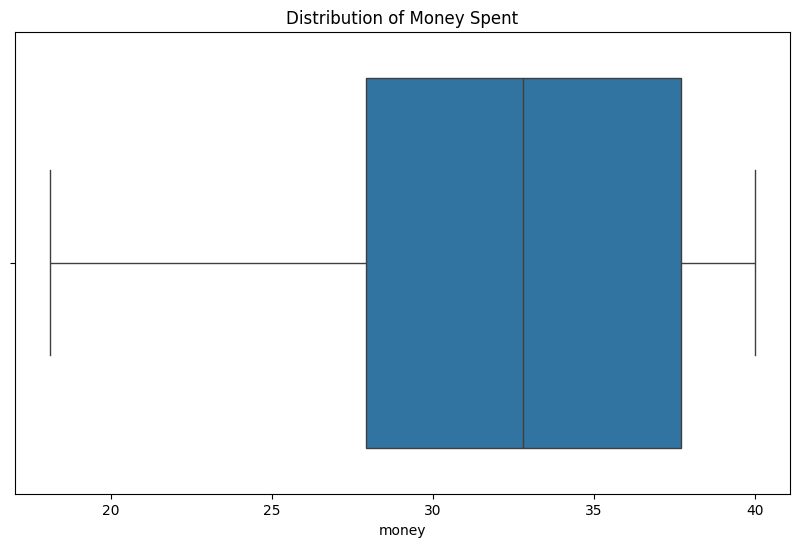

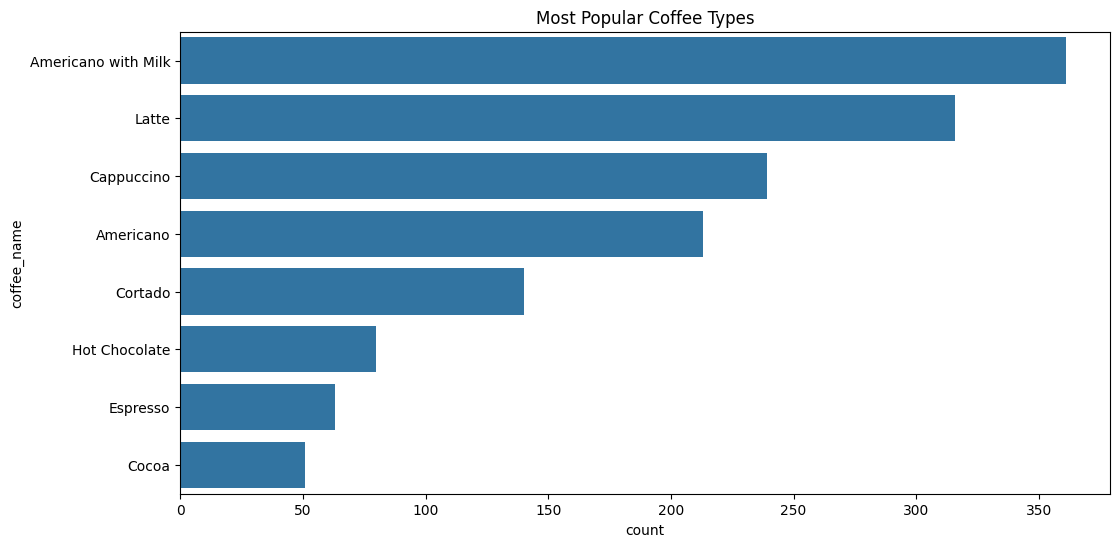

In [672]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of money spent to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=coff2, x='money')
plt.title("Distribution of Money Spent")
plt.show()

# Analyzing the most popular coffee types
plt.figure(figsize=(12, 6))
sns.countplot(data=coff2, y='coffee_name', order=coff2['coffee_name'].value_counts().index)
plt.title("Most Popular Coffee Types")
plt.show()


In [673]:
sales_by_time = coff.groupby('time_period')['money'].sum().reset_index()
print(sales_by_time)

  time_period     money
0   Afternoon  18246.02
1     Evening  13741.64
2     Morning  14980.34


In [674]:
sales_by_payment = coff.groupby('cash_type')['money'].sum().reset_index()
print(sales_by_payment)

  cash_type    money
0      card  43782.0
1      cash   3186.0


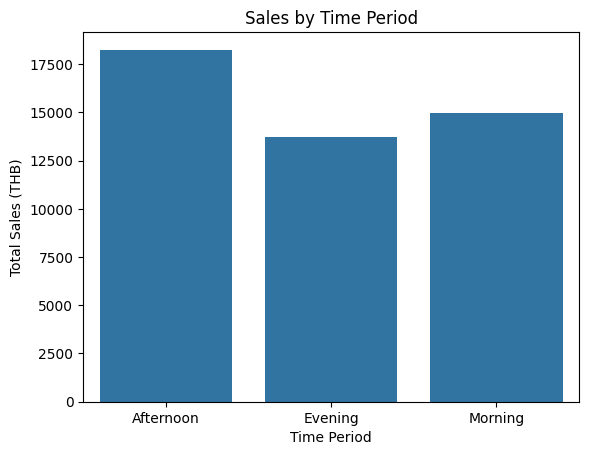

In [675]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='time_period', y='money', data=sales_by_time)
plt.title('Sales by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Sales (THB)')
plt.show()

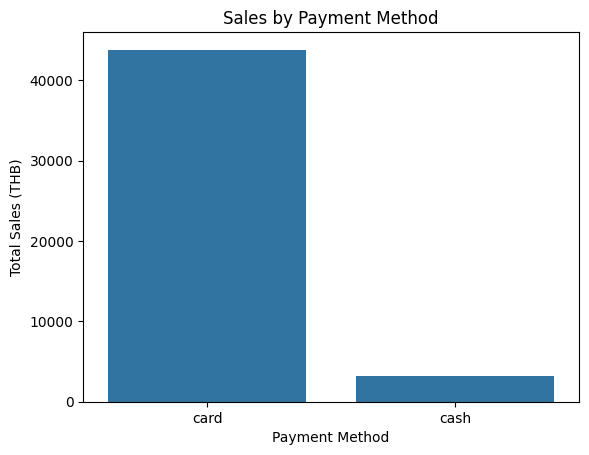

In [676]:
sns.barplot(x='cash_type', y='money', data=sales_by_payment)
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales (THB)')
plt.show()

การทำการทดสอบสถิติเพื่อดูว่ายอดขายในช่วงเวลาต่าง หากคุณต้องการเปรียบเทียบยอดขายระหว่างสามช่วงเวลา (เช้า บ่าย เย็น) คุณสามารถใช้ การทดสอบ ANOVA (Analysis of Variance) ได้